# Your Uni: kem2231
# Your AI Model Share Username: kem2231
# Your Full name: Kate McGrath
# Link to your Public Github repository with Final report: https://github.com/katemcg/advanced_ml/tree/main/hw1

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Share your models to a centralized leaderboard
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



In [44]:
#install aimodelshare library
! pip install aimodelshare --upgrade

## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [2]:
# Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell

X_train.head()
y_train_labels.head()
# y_train.head()

0      Average
1         High
2      Average
3    Very High
4         High
dtype: object

Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [4]:
# Your answer: The line finds which column in y_train has the highestest value
  # for each row, and outputs the name of that column alongside its index. This
  # is different because y_train_labels just gives the labels, and y_train is
  # one-hot encoded, with binary columns for each of the 5 categories.

##  Add new data

In [5]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [6]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train = X_train.merge(countrydata, left_on='Country or region', right_on='country_name', how='left')
X_test = X_test.merge(countrydata, left_on='Country or region', right_on='country_name', how='left')


In [7]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Peru,0.96,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.0,Peru,32165485.0,22.7,0.739749,74.814,13.38634,9.01347,11294.84033


# EDA

In [8]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [9]:
## Your answer: the name of each column in X_train alongside what kind of data
  # it holds.

Find out the number and percentage of missing values in the table per column

In [10]:
# Your code here:
print("count null by col:")
print(X_train.isnull().sum())

print("\npercent null by col:")
print(round(X_train.isnull().sum() * 100 / len(X_train), 3))

count null by col:
Country or region                 0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
name                              0
region                            0
sub-region                        0
Terrorist_attacks                 0
country_name                      6
population                        6
population_below_poverty_line    15
hdi                               6
life_expectancy                   6
expected_years_of_schooling       6
mean_years_of_schooling           6
gni                               6
dtype: int64

percent null by col:
Country or region                 0.000
GDP per capita                    0.000
Social support                    0.000
Healthy life expectancy           0.000
Freedom to make life choices      0.000
Generosity                        0.000
Perceptions of corrupt

In [11]:
# the cols with missing values are as follows --
  # country_name is missing 6, or 6.818%
  # population is missing 6,
  # population_below_poverty_line is missing 15, or 17.045
  # hdi is missing 6, or 6.818%
  # life_expectancy is missing 6, or 6.818%
  # expected_years_of_schooling is missing 6, or 6.818%
  # mean_years_of_schooling is missing 6, or 6.818%
  # gni is missing 6, or 6.818%

Plot the frequency distribution / histogram of some of the numerical features that you think are important

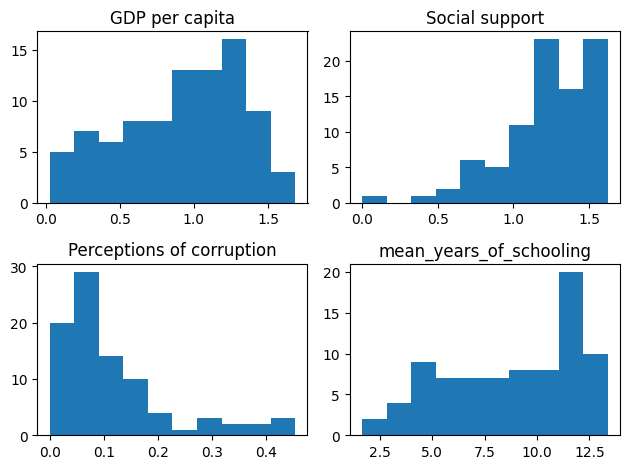

In [12]:
import matplotlib.pyplot as plt

# Your plotting code here:

plt.subplot(2, 2, 1)
plt.title("GDP per capita")
plt.hist(X_train["GDP per capita"])

plt.subplot(2, 2, 2)
plt.title("Social support")
plt.hist(X_train["Social support"])

plt.subplot(2, 2, 3)
plt.title("Perceptions of corruption")
plt.hist(X_train["Perceptions of corruption"])

plt.subplot(2, 2, 4)
plt.title("mean_years_of_schooling")
plt.hist(X_train["mean_years_of_schooling"])

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

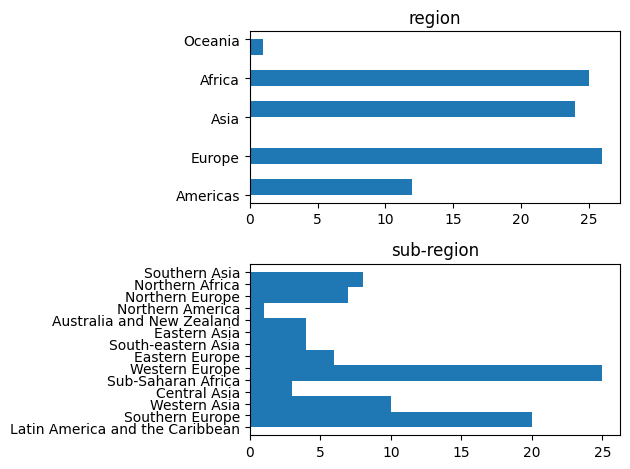

In [13]:
# Your plotting code here:

# "Country or region", "name", and "country_name", each value is unique

plt.subplot(2, 1, 1)
plt.title("region")
plt.hist(X_train["region"], orientation="horizontal")

plt.subplot(2, 1, 2)
plt.title("sub-region")
plt.hist(X_train["sub-region"], orientation="horizontal")

plt.tight_layout()
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

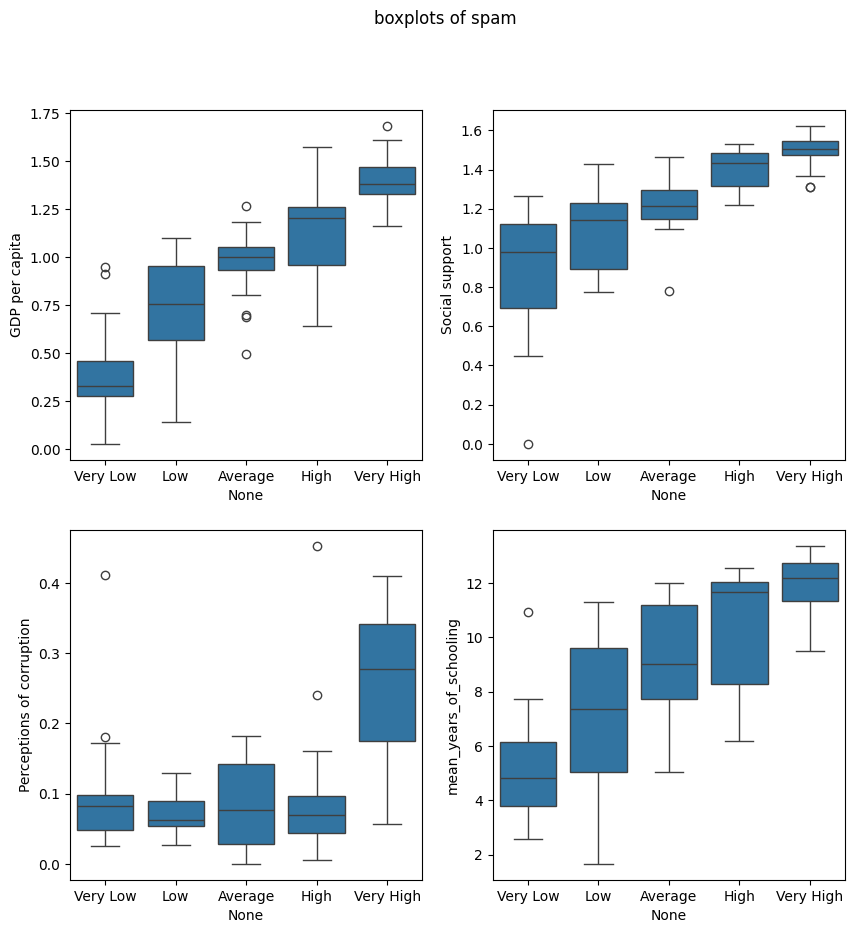

<ipython-input-14-a91d1e7c9c67>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,Average,High,Low,Very High,Very Low
GDP per capita,1.000000,0.753791,0.840467,0.458313,-0.069164,0.349372,-0.352544,0.018178,-0.732533,0.958917,0.832590,0.835412,0.828709,0.806649,0.051739,0.301570,-0.212943,0.535386,-0.669859
Social support,0.753791,1.000000,0.709605,0.502305,-0.015965,0.279549,-0.339582,-0.043590,-0.584165,0.793944,0.687287,0.735139,0.747244,0.511369,-0.009627,0.364985,-0.196540,0.429462,-0.594814
Healthy life expectancy,0.840467,0.709605,1.000000,0.419038,-0.024471,0.371450,-0.410411,0.034756,-0.727536,0.920931,0.983942,0.840063,0.790596,0.610898,0.090037,0.331126,-0.256717,0.466067,-0.632595
Freedom to make life choices,0.458313,0.502305,0.419038,1.000000,0.327923,0.496876,-0.362758,0.099374,-0.355667,0.409265,0.375812,0.372584,0.342081,0.427295,-0.162757,0.190748,-0.120007,0.460048,-0.359589
Generosity,-0.069164,-0.015965,-0.024471,0.327923,1.000000,0.327683,0.032479,-0.073973,0.060410,-0.091719,-0.035168,-0.105087,-0.069261,0.066596,-0.170551,-0.197341,-0.120610,0.328617,0.187748
Perceptions of corruption,0.349372,0.279549,0.371450,0.496876,0.327683,1.000000,-0.160908,-0.054870,-0.179750,0.339824,0.333761,0.297075,0.294643,0.493324,-0.171968,-0.127102,-0.198926,0.614461,-0.077852
Terrorist_attacks,-0.352544,-0.339582,-0.410411,-0.362758,0.032479,-0.160908,1.000000,-0.013998,0.359939,-0.357929,-0.366955,-0.269991,-0.374004,-0.224270,-0.002838,-0.181678,-0.137488,-0.150297,0.469382
population,0.018178,-0.043590,0.034756,0.099374,-0.073973,-0.054870,-0.013998,1.000000,-0.157285,-0.006420,0.017035,-0.011698,-0.069058,-0.064637,0.277812,-0.078007,-0.055444,-0.080704,-0.052524
population_below_poverty_line,-0.732533,-0.584165,-0.727536,-0.355667,0.060410,-0.179750,0.359939,-0.157285,1.000000,-0.731890,-0.708213,-0.620384,-0.643927,-0.534577,-0.160960,-0.197814,-0.009128,-0.305039,0.625527
hdi,0.958917,0.793944,0.920931,0.409265,-0.091719,0.339824,-0.357929,-0.006420,-0.731890,1.000000,0.909147,0.925231,0.912245,0.700151,0.035052,0.317813,-0.236469,0.530289,-0.661853


In [14]:
# Your plotting code(s) here:

import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

order = ["Very Low", "Low", "Average", "High", "Very High"]

# seeing how the vars I chose above interact with the target var y
sns.boxplot(x=y_train_labels, y=X_train["GDP per capita"], ax=axs[0][0], order=order)
sns.boxplot(x=y_train_labels, y=X_train["Social support"], ax=axs[0][1], order=order)
sns.boxplot(x=y_train_labels, y=X_train["Perceptions of corruption"], ax=axs[1][0], order=order)
sns.boxplot(x=y_train_labels, y=X_train["mean_years_of_schooling"], ax=axs[1][1], order=order)

fig.suptitle("boxplots of world happiness")
plt.show()

# a correlation table for everything
df = pd.concat([X_train, y_train], axis=1)

df.corr()

Write what you observed and your General comments on what should be done:

In [15]:
# Your comments here
# I focused on visualizing GDP per capita, social support, perceptions of corruption,
  # and mean years of schooling. besides perceptions of corruption, these all seem
  # to be strongly correlated with the target variable. Looking at the correlation table,
  # freedom to make life choices and genoristy also seem to be tied.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['int64', 'float64']) ## Drop all the non-numerical features from X_train
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [17]:
## Your answer :
# the preprocessing pipelines for both numeric and categorical data, starting with numeric --
  # only inlcuding the features from X_train that are either ints or floats.
  # the imputer initally used the strategy of filling all missing values with 0,
  # however, I opted to change this strategy out to use the median instead. this is
  # because I believe that using the median is more realistic for missing data, and
  # is less biased than using the mean would be.
  # the scaler then standardizes the data
# as for the categorical featuers --
  # set the imputer to replace missing values with the most frequent value. this
  # makes sense for categorical vars, because it is safe to assume that the missing
  # value is most likely to also be the most frequent value.
  # onehot one hot encodes the cat features (creating binary cols for each unique value),
  # and is set to ignore any value it does not recognize.
# in all, these transformers are used in the column transformer to preprocess their
  # respective features.

In [18]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [19]:
## Your Answer :
# the preprocessor object holds the information of ColumnTransformer, how all the
  # features will be transformed. the only information it has of the dataset is the
  # column names.
# the preprocess object using the previous object preprocessor to fit all transformers
  # using X_train. it returns a ColumnTransformer again, but now including the specifics
  # of our X_train data.
# lastly, preprocessed_data transforms X_train according to each transformer, and
  # combines the resulting transformations into a new dataset. this results in a dataset
  # with the same number of rows as before, but, in this case, additional columns as
  # a result of the one hot encoding

# source: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer.transform

# checking original dims
X_train.shape

(88, 19)

In [20]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 33)

##3. Fit model on preprocessed data and save preprocessor function and model


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=4)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.

print("forest train set score: {:.3f}".format(model.score(preprocessor(X_train), y_train_labels)))

# Your cell should have a score between 0-1 as output

forest train set score: 0.920


#### Save preprocessor function to local "preprocessor.zip" file

In [22]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [23]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features -- 33 features
print(feature_count)
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

33


## 4. Generate predictions from X_test data and submit model to competition


In [24]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground
## Do not change this
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [25]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [26]:
#Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

model_filepath1 = "model.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath1,
                           preprocessor=preprocessor_filepath,
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1043

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## 5. Repeat submission process to improve place on leaderboard


In [28]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# increased n_estimators from 200 to 500, max_depth from 4 to 8
model_2 = RandomForestClassifier(n_estimators=500, max_depth=8)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.

print("forest train set score: {:.3f}".format(model_2.score(preprocessor(X_train), y_train_labels)))

forest train set score: 1.000


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [29]:
## Your answer : increased n_estimators from 200 to 500, max_depth from 4 to 8.
  # n_estimators is the number of trees that the model generates -- adding more trees
    # means we can better learn the data, but it is also more time consuming and
    # runs the risk of overfitting.
  # max_depth is the number of times internal nodes are split, and the deeper the tree,
    # the more information there is to be learned.
  # so by increasing both these params, we have a more nuanced model that has improved
    # its performance.

In [34]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count = preprocessor(X_test).shape[1] #Get count of preprocessed features -- 33 features
print(feature_count)
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

# Serialize your model to save it as an onnx file
with open("model_2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

33


In [35]:
#Submit Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test)) # Predict
model_filepath2 = "model_2.onnx" # Your serialized model

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath2,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1045

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [36]:
# Compare two or more models
data=mycompetition.compare_models([2,3], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_2,model_version_3
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,3,5
5,max_features,auto,auto,auto
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [37]:
## Your answer: I had initally started by using grid search to find the best params
  # for the RandomForestClassifier, but changed this when I realized I'd have a chance
  # to use it later in the hw. So, yes it is definitely worth changing the params more,
  # but now using grid search rather than choosing random values.

In [39]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# using grid search cv to choose magnitude of...
# number of trees, max depth, max features, and criterion
# commented out options because it takes so long, tested one by one
param_grid = {
    'n_estimators': np.arange(200, 500, 100),
    'max_depth' : np.arange(2, 10, 2),
    'max_features': ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# fitting the model and choosing best params
gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10) ## Define a Random Forest Model here, fit it, and score it
gridmodel.fit(preprocessor(X_train), y_train_labels)

# the chosen params are n_est=200, max_depth=8, max_features=log2, criterion=gini
print("best forest params: {}".format(gridmodel.best_params_))
print("forest train set score: {:.3f}".format(gridmodel.score(preprocessor(X_train), y_train_labels)))
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))

best forest params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
forest train set score: 1.000
best mean cross-validation score: 0.682


In [40]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [41]:
#Submit Model 3:

#-- Generate predicted y values (grid model)
prediction_labels = gridmodel.predict(preprocessor(X_test)) # Predict
gridmodel_filepath = "gridmodel.onnx" # Your serialized model

# Submit grid model Competition Leaderboard
mycompetition.submit_model(model = gridmodel_filepath,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1046

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [43]:
# Compare two or more models
data=mycompetition.compare_models([3,4], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_3,model_version_4
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,5,5
5,max_features,auto,auto,auto
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None


In [47]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# using grid search cv to choose magnitude of C, gamma
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 5, 10, 50],
    'gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# fitting the model and choosing best params
svm = GridSearchCV(SVC(), param_grid=param_grid, cv=10)

# defining the best model
svm.fit(preprocessor(X_train), y_train_labels)

# the chosen params are C=50, gamma=0.005, and kernel=rbf
print("best svm params: {}".format(svm.best_params_))
print("svm train set score: {:.3f}".format(svm.score(preprocessor(X_train), y_train_labels)))
print("best svm mean cross-validation score: {:.3f}".format(svm.best_score_))

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(svm, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("svm.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = svm.predict(preprocessor(X_test))

model_filepath4 = "svm.onnx"

# Submit model to Competition Leaderboard
mycompetition.submit_model(model = model_filepath4,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

best svm params: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
svm train set score: 0.807
best svm mean cross-validation score: 0.694
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1068

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer: I used SVC (support vector classifier), and ran grid search for to
  # choose the params for kernel, C, and gamma. the kernel type chosen was rbf, the
  # default. C is the regularization parameter, and is chosen to be 50 -- because C
  # is large, it means that the classifier is penalized for misclassified data, and
  # will try to avoid it. lastly, gamma is the kernel coefficient, the smallest option
  # chosen as the best.
# I chose to use the support vector method because it is known to be good with smaller
  # data sets, such as this, and it is a very flexible model that can learn a lot.
  # using this method gave a train set score of 0.807, and a mean cross val score of
  # 0.694. this is slightly higher than the previous method using random forest, but
  # it still does not reach my highest ranking on the leaderboard.

# 6. Basic Deep Learning

In [54]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count = preprocessor(X_test).shape[1] #count features in input data

keras_model = Sequential([ ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
    Dense(128, input_dim=feature_count),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
])

#Use Softmax activation in last layer. How many neurons should there be in the last layer?
  # there should be 5 neurons in the last layer because there are 5 categories in
  # y, the target variable (very low, low, average, high, very high)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_hist = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
                       batch_size = 20,
                       epochs = 300, validation_split=0.25)

Epoch 1/300
4/4 [==============================] - 1s 63ms/step - loss: 1.6664 - accuracy: 0.1515 - val_loss: 1.6760 - val_accuracy: 0.2727
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 1.6474 - accuracy: 0.1364 - val_loss: 1.6568 - val_accuracy: 0.2273
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 1.6268 - accuracy: 0.1515 - val_loss: 1.6448 - val_accuracy: 0.1818
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 1.6119 - accuracy: 0.1667 - val_loss: 1.6361 - val_accuracy: 0.1818
Epoch 5/300
4/4 [==============================] - 0s 10ms/step - loss: 1.5983 - accuracy: 0.1667 - val_loss: 1.6239 - val_accuracy: 0.1818
Epoch 6/300
4/4 [==============================] - 0s 15ms/step - loss: 1.5824 - accuracy: 0.1970 - val_loss: 1.6134 - val_accuracy: 0.1818
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 1.5700 - accuracy: 0.2273 - val_loss: 1.6057 - val_accuracy: 0.1818
Epoch 8/300
4/4 [=======

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [51]:
## Your answer: I used relu for the middle layers because it is one of the most
  # popular activations, and seems well suited for this case as well.
# softmax fits for the last layer because it transforms the vector into a probability
  # distribution. this is needed for our y because we want to know how likely each
  # category is.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [52]:
## Your answer: the number of epochs is important, and there being too many or too
  # few can result in overfitting or underfitting respectively. with no further information,
  # 300 epochs seems to be a good number.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer: this computes the crossentropy loss between the labels and predictions,
  # which is meant to be used when there are two plus label classes (there are 5 here,
  # so it is fitting). sgd is for the gradient descent optimizer. for this, there are
  # many other optimizers that might make sense, such as the adam algorithm, which
  # is very efficient.

Can you try getting the model's training history out and plotting the curves?

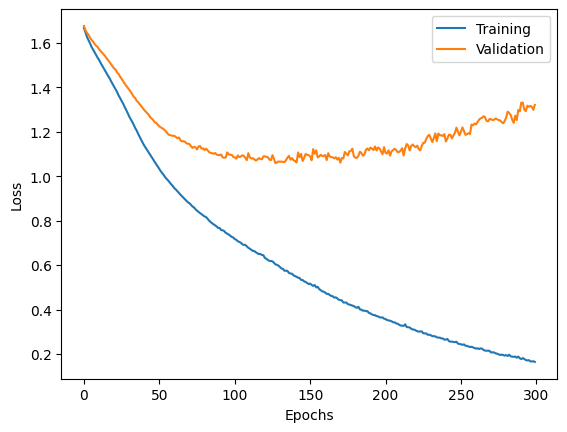

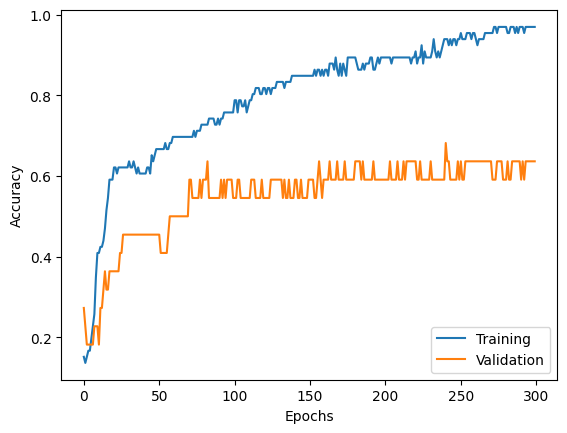

In [55]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(keras_hist.history['loss'])
plt.plot(keras_hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(keras_hist.history['accuracy'])
plt.plot(keras_hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [57]:
# Save keras model to ONNX file

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("keras_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [58]:
# Submit keras model:

#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = keras_model.predict(preprocessor(X_test)).argmax(axis=1) # Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

model_filepath5 = "keras_model.onnx"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath5,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

3/3 [==============================] - 0s 3ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1085

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Check leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked